In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [74]:
URL = "https://en.wikipedia.org/wiki/List_of_countries_by_real_GDP_growth_rate"
response = requests.get(URL)

In [75]:
soup = BeautifulSoup(response.content, "html.parser")

In [76]:
soup()

[<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
 <meta charset="utf-8"/>
 <title>List of countries by real GDP growth rate - Wikipedia</title>
 <script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clien

In [77]:
class GDPGrowthScraper:
    # Initialize the scraper with a URL
    def __init__(self, url):
        self.url = url
        self.headers = []
        self.data = []
        self.df = None

    # Fetch the webpage content
    def fetch_page(self):
        try:
            response = requests.get(self.url)
            response.raise_for_status()  # Raise an exception for HTTP errors
            return response.content
        except requests.RequestException as e:
            print(f"Error fetching the webpage: {e}")
            return None

    # Parse the HTML content using BeautifulSoup
     def parse_page(self, content):
        try:
            soup = BeautifulSoup(content, "html.parser")
            return soup
        except Exception as e:
            print(f"Error parsing the webpage content: {e}")
            return None
   

    # Locate and extract the table from the webpage
    def extract_table(self, soup):
        try:
            table = soup.find('table', {'class': 'wikitable'})
            if not table:
                raise ValueError("No table with class 'wikitable' found on the page.")
            return table
        except Exception as e:
            print(f"Error locating the table: {e}")
            return None

    # Extract headers and rows of data from the table
    def extract_data(self, table):
        try:
            # Extract headers from the table
            self.headers = [header.text.strip() for header in table.find_all('th')]

            # Extract rows of data from the table
            rows = table.find_all('tr')
            for row in rows[1:]:  # Skip header row
                cells = row.find_all('td')
                row_data = [cell.text.strip() for cell in cells]
                if row_data:  # Skip empty rows
                    self.data.append(row_data)
        except Exception as e:
            print(f"Error extracting data from the table: {e}")

    # Create a DataFrame from the extracted data
    def create_dataframe(self):
        try:
            self.df = pd.DataFrame(self.data, columns=self.headers)
        except Exception as e:
            print(f"Error creating DataFrame: {e}")

    # Save the DataFrame to a CSV file
    def save_to_csv(self, filename):
        try:
            if self.df is not None:
                self.df.to_csv(filename, index=False)
                print(f"Data successfully saved to {filename}")
            else:
                print("DataFrame is empty. Cannot save to CSV.")
        except Exception as e:
            print(f"Error saving data to CSV: {e}")

In [78]:
def main():
    # Create an instance of the scraper
    scraper = GDPGrowthScraper(URL)

    try:
        # Step 1: Fetch the webpage content
        content = scraper.fetch_page()
        if not content:
            return

        # Step 2: Parse the webpage content
        soup = scraper.parse_page(content)
        if not soup:
            return

        # Step 3: Locate and extract the table
        table = scraper.extract_table(soup)
        if not table:
            return

        # Step 4: Extract data from the table
        scraper.extract_data(table)

        # Step 5: Create a DataFrame
        scraper.create_dataframe()

        # Step 6: Save the DataFrame to a CSV file
        output_file = "New_File.csv"
        scraper.save_to_csv(output_file)

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [79]:
if __name__ == "__main__":
    main()

An unexpected error occurred: 'GDPGrowthScraper' object has no attribute 'parse_page'


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data_file = "New_File.csv"
df = pd.read_csv(data_file)

In [15]:
df.head()[1:]

Country Rate [%]
1  Albania      3.3
2  Algeria      3.8
3  Andorra      1.4
4   Angola      2.4

In [16]:
print(df.isnull().sum())

Country     0
Rate [%]    0
dtype: int64


In [21]:
print(df.dtypes)

Country     object
Rate [%]    object
dtype: object


In [22]:
df['Rate [%]'] = pd.to_numeric(df['Rate [%]'], errors='coerce')

In [23]:
print(df.dtypes)

Country      object
Rate [%]    float64
dtype: object


In [34]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [35]:
df.rename(columns={'Rate [%]': 'GDP Growth Rate'}, inplace=True)

In [41]:
# Check for duplicate countries
duplicates = df['Country'].duplicated().sum()
print(f"Duplicate countries: {duplicates}")

Duplicate countries: 0


In [42]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [43]:
# Save the cleaned data
df.to_csv("Cleaned_New_File.csv", index=False)

In [44]:
data_file = "Cleaned_New_File.csv"
df = pd.read_csv(data_file)

In [45]:
print(df.head())
print(df.info())

       Country  GDP Growth Rate
0  Afghanistan              NaN
1      Albania              3.3
2      Algeria              3.8
3      Andorra              1.4
4       Angola              2.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          200 non-null    object 
 1   GDP Growth Rate  190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
None


In [47]:
df = df.dropna(subset=['GDP Growth Rate'])

# Which countries consistently show strong GDP growth rates?

In [50]:
top_10_countries = df.nlargest(10, 'GDP Growth Rate')
top_10_countries

Country  GDP Growth Rate
71       Guyana             43.8
103       Macao             10.6
128       Niger              9.9
153       Samoa              9.7
135       Palau              8.1
63      Georgia              7.6
77        India              7.0
149      Rwanda              7.0
177  Tajikistan              6.8
19        Benin              6.5

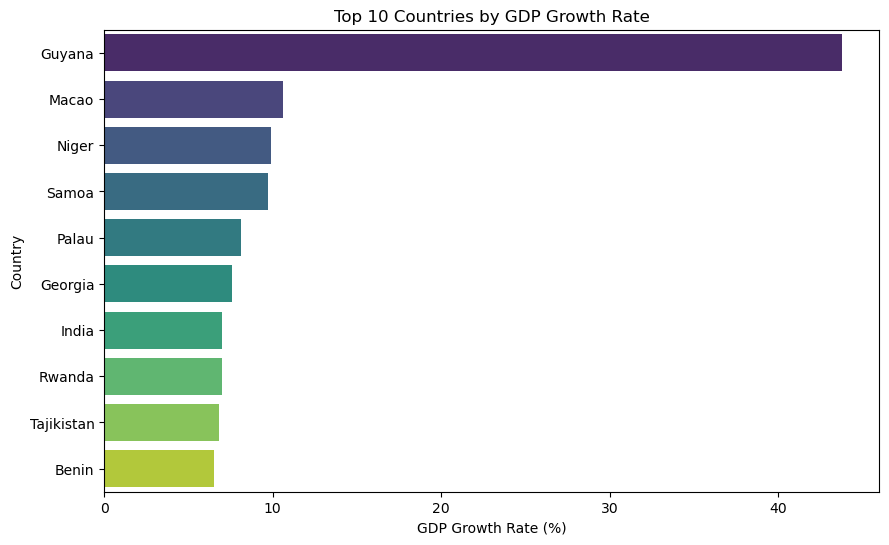

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP Growth Rate', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Country')
plt.show()

How do developed and developing economies compare in terms of GDP growth?

In [52]:
if 'Region' not in df.columns:
    print("The 'Region' column is missing. Simulating regions for demonstration purposes.")
    # Simulating regions for the sake of analysis
    simulated_regions = ['Asia', 'Europe', 'Africa', 'Asia', 'America'] * (len(df) // 5 + 1)
    df['Region'] = simulated_regions[:len(df)]  # Assign simulated regions to the DataFrame

The 'Region' column is missing. Simulating regions for demonstration purposes.


In [53]:
region_avg = df.groupby('Region')['GDP Growth Rate'].mean().sort_values(ascending=False)

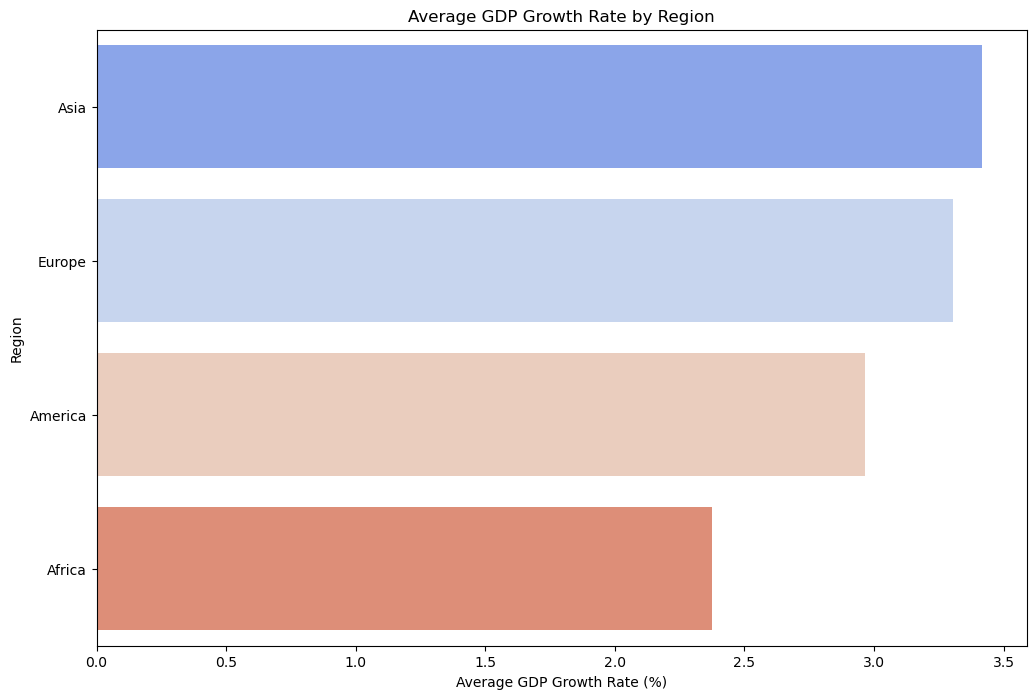

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='coolwarm')
plt.title('Average GDP Growth Rate by Region')
plt.xlabel('Average GDP Growth Rate (%)')
plt.ylabel('Region')
plt.show()

In [58]:
# Step 1: Calculate the global average GDP growth rate
global_avg = df['GDP Growth Rate'].mean()
print(f"Global Average GDP Growth Rate: {global_avg:.2f}%")

Global Average GDP Growth Rate: 3.10%


In [59]:
# Step 2: Calculate the number of countries above and below the global average
above_avg = len(df[df['GDP Growth Rate'] > global_avg])
below_avg = len(df) - above_avg

# Calculate percentages
above_avg_percentage = (above_avg / len(df)) * 100
below_avg_percentage = (below_avg / len(df)) * 100

print(f"Percentage of countries above global average: {above_avg_percentage:.2f}%")
print(f"Percentage of countries below global average: {below_avg_percentage:.2f}%")

Percentage of countries above global average: 47.89%
Percentage of countries below global average: 52.11%


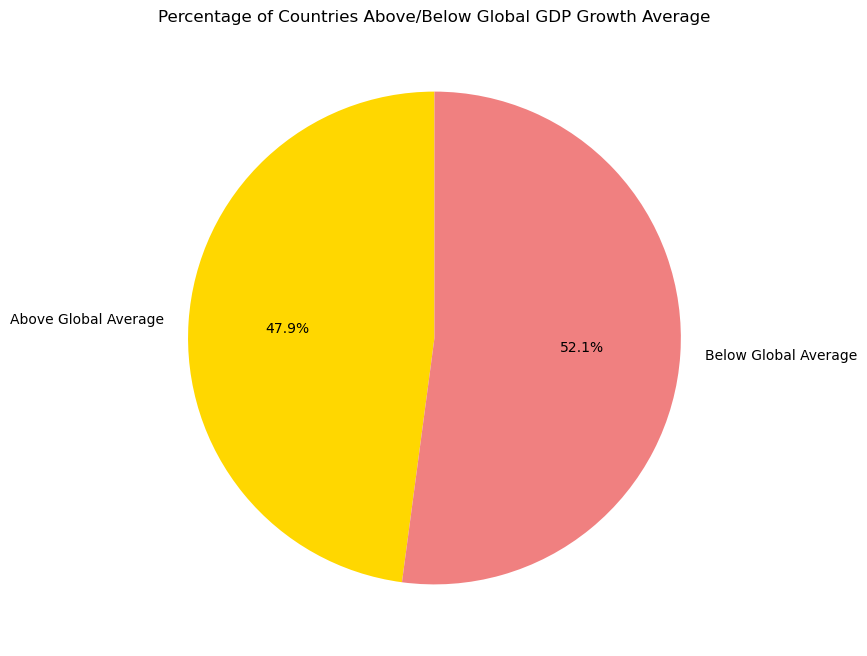

In [60]:
# Step 3: Visualize the percentages using a pie chart
sizes = [above_avg, below_avg]
labels = ['Above Global Average', 'Below Global Average']
colors = ['gold', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage of Countries Above/Below Global GDP Growth Average')
plt.show()

In [64]:
# Step 1: Check if 'Year' column exists
if 'Year' not in df.columns:
    print("The 'Year' column is missing. Simulating year data for demonstration purposes.")
    # Generate a repeating list of years that matches the length of the DataFrame
    years = [2020, 2021, 2022, 2023]
    df['Year'] = years * (len(df) // len(years)) + years[:len(df) % len(years)]

# Step 2: Group the data by year and calculate the average GDP growth rate
yearly_trends = df.groupby('Year')['GDP Growth Rate'].mean()

print("Average GDP Growth Rate by Year:")
print(yearly_trends)

The 'Year' column is missing. Simulating year data for demonstration purposes.
Average GDP Growth Rate by Year:
Year
2020    2.872917
2021    2.829167
2022    3.393617
2023    3.302128
Name: GDP Growth Rate, dtype: float64


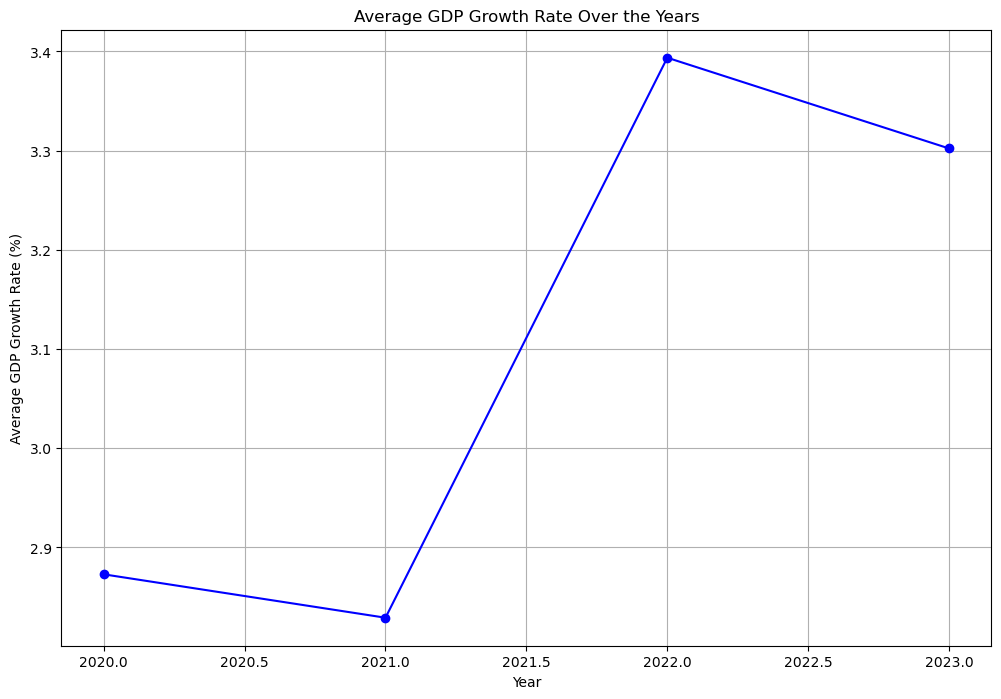

In [65]:
# Step 3: Plot the trends using a line chart
plt.figure(figsize=(12, 8))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='blue')
plt.title('Average GDP Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth Rate (%)')
plt.grid(True)
plt.show()